
<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/47_SVM_Kernel_Trick.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 🤺 SVM & Kernel Trick: Matematyczne Jiu-Jitsu

Wyobraź sobie, że na stole leżą wymieszane kulki czerwone i niebieskie.
Czerwone są w środku, niebieskie dookoła nich.
Nie da się położyć na stole prostego kija (linii), żeby je rozdzielić.

**Kernel Trick (Trik Jądrowy):**
SVM uderza ręką w stół. Kulki podskakują.
Czerwone są lżejsze -> lecą wysoko.
Niebieskie są cięższe -> zostają nisko.
Teraz, w powietrzu (w 3D), możesz włożyć między nie płaską kartkę papieru (płaszczyznę).

Gdy spojrzysz z góry (rzut na 2D), ta kartka będzie wyglądać jak **kółko**.
To jest właśnie nieliniowa klasyfikacja.

Użyjemy zbioru `make_circles`, żeby to zobaczyć.

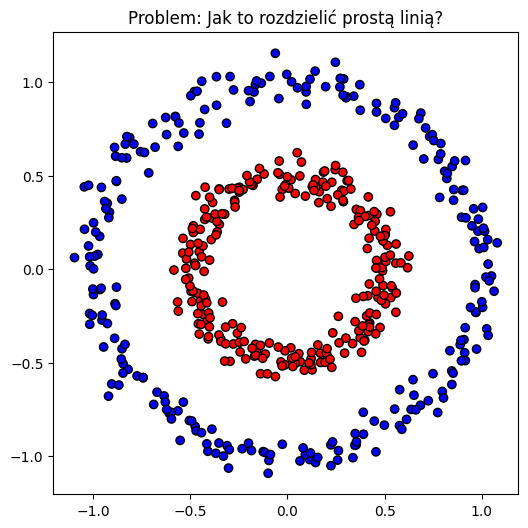

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. DANE NIELINIOWE
# Czerwone w środku, niebieskie na zewnątrz
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Problem: Jak to rozdzielić prostą linią?")
plt.show()

## Podejście 1: Model Liniowy (Porażka)

Spróbujmy użyć **Regresji Logistycznej** (lub SVM z kernelem liniowym).
Model będzie próbował narysować prostą kreskę. To fizycznie niemożliwe, żeby oddzielić środek od zewnętrza jedną kreską.

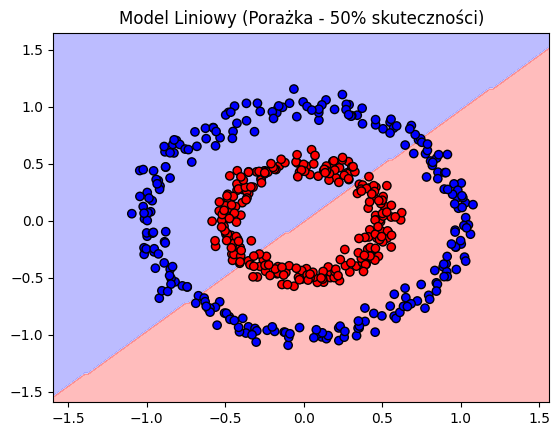

In [2]:
# Trenujemy model liniowy
clf_linear = LogisticRegression()
clf_linear.fit(X, y)

# Funkcja do rysowania granic (skopiujmy ją sobie, przyda się)
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(clf_linear, X, y, "Model Liniowy (Porażka - 50% skuteczności)")

## Podejście 2: SVM z Kernelem RBF (Magia)

Teraz użyjemy `SVC` z parametrem `kernel='rbf'` (Radial Basis Function).
To jest ten moment, w którym model "wygina przestrzeń".

Matematycznie RBF liczy podobieństwo każdego punktu do pewnych punktów centralnych (Landmarks). Działa jak góry i doliny.

Kluczowe parametry:
1.  **C (Koszt):** Jak bardzo karamy za błędy? (Duże C = Wąski margines, mało błędów, ryzyko overfittingu).
2.  **Gamma:** Jak daleko sięga wpływ jednego punktu? (Duża gamma = każdy punkt tworzy własną "wyspę").

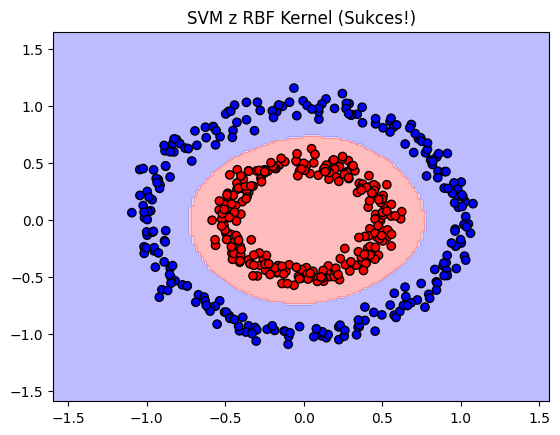

In [3]:
# Trenujemy SVM z RBF
# C=1.0 (Standard)
# Gamma='scale' (Automatyczna)
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X, y)

plot_decision_boundary(svm_rbf, X, y, "SVM z RBF Kernel (Sukces!)")

## Wizualizacja 3D (Co się stało pod spodem?)

Dlaczego to zadziałało?
Dodajmy sztucznie trzeci wymiar.
Niech Oś Z zależy od odległości od środka: $z = x^2 + y^2$.

Zobaczysz, że w 3D te dane są **płaskie** i da się je przeciąć kartką papieru.

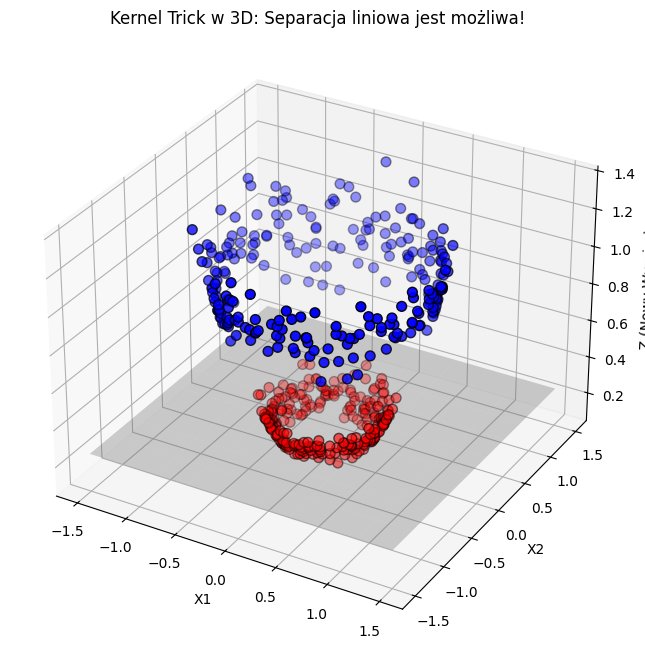

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Dodajemy 3 wymiar: Odległość od środka
z = X[:, 0]**2 + X[:, 1]**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Rysujemy punkty 3D
ax.scatter(X[:, 0], X[:, 1], z, c=y, cmap='bwr', s=50, edgecolor='k')

# Rysujemy płaszczyznę cięcia (tę "kartkę papieru")
# W tym przypadku kartka jest na wysokości z = ok. 0.25
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10))
zz = np.full_like(xx, 0.25) # Stała wysokość
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_title("Kernel Trick w 3D: Separacja liniowa jest możliwa!")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Z (Nowy Wymiar)")
plt.show()

## 🧠 Podsumowanie: Czy SVM jest nadal używany?

W erze Deep Learningu SVM stracił na popularności przy obrazkach (CNN są lepsze) i tekście (Transformery są lepsze).

Ale SVM nadal króluje w dwóch przypadkach:
1.  **Małe dane:** Gdy masz 50 próbek, Sieć Neuronowa niczego się nie nauczy. SVM zadziała świetnie.
2.  **Wysoki wymiar:** Gdy masz więcej cech niż próbek (np. genetyka, 100 pacjentów i 20 000 genów). SVM radzi sobie z tym matematycznie najlepiej.

**Zapamiętaj:**
Jeśli dane nie są liniowe -> użyj Kernela RBF. To jak zagięcie przestrzeni, żeby uprościć problem.